In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
df=pd.read_csv("C:\\Users\\anjal\\Downloads\\Oasis infobyte data files\\Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [11]:
df['category'] = df['category'].replace({-1: 'negative', 0: 'neutral', 1: 'positive'})

In [12]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,negative
1,talk all the nonsense and continue all the dra...,neutral
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive


In [13]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [15]:
df.dropna(subset=['clean_text','category'],inplace=True)

In [16]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  object
 1   category    162969 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [24]:
df.nunique()

clean_text    162969
category           3
dtype: int64

In [26]:
df['category'].value_counts()

category
positive    72249
neutral     55211
negative    35509
Name: count, dtype: int64

In [29]:
df['category'].isnull().sum()

0

In [31]:
df['clean_text'].isnull().sum()

0

In [33]:
from sklearn.model_selection import train_test_split

# Drop rows with missing values
cleaned_data = df.dropna()

# Split the data into features (X) and target (y)
X = cleaned_data['clean_text']
y = cleaned_data['category']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the resulting dataset sizes
len(X_train), len(X_test), len(y_train), len(y_test)

(130375, 32594, 130375, 32594)

In [35]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['clean_text'].apply(pol)
df['subjectivity'] = df['clean_text'].apply(sub)
df

,clean_text,category,polarity,subjectivity
0,when modi promised “minimum government maximum...,negative,-0.300000,0.700000
1,talk all the nonsense and continue all the dra...,neutral,0.000000,0.000000
2,what did just say vote for modi welcome bjp t...,positive,0.483333,0.616667
3,asking his supporters prefix chowkidar their n...,positive,0.150000,0.658333
4,answer who among these the most powerful world...,positive,0.400000,0.750000
...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,negative,-0.291667,0.541667
162976,dear rss terrorist payal gawar what about modi...,negative,-0.195833,0.433333
162977,did you cover her interaction forum where she ...,neutral,0.000000,0.000000
162978,there big project came into india modi dream p...,neutral,0.000000,0.100000


In [36]:
#SVM Support Vector Machine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"])
print(report)

              precision    recall  f1-score   support

    Negative       0.86      0.74      0.80      7102
     Neutral       0.81      0.95      0.87     11042
    Positive       0.90      0.84      0.87     14450

    accuracy                           0.86     32594
   macro avg       0.86      0.84      0.85     32594
weighted avg       0.86      0.86      0.85     32594



In [37]:
# Naive Bays
from sklearn.naive_bayes import MultinomialNB

# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_nb, target_names=["Negative", "Neutral", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.81      0.48      0.61      7102
     Neutral       0.78      0.67      0.72     11042
    Positive       0.67      0.87      0.76     14450

    accuracy                           0.72     32594
   macro avg       0.75      0.68      0.69     32594
weighted avg       0.74      0.72      0.71     32594



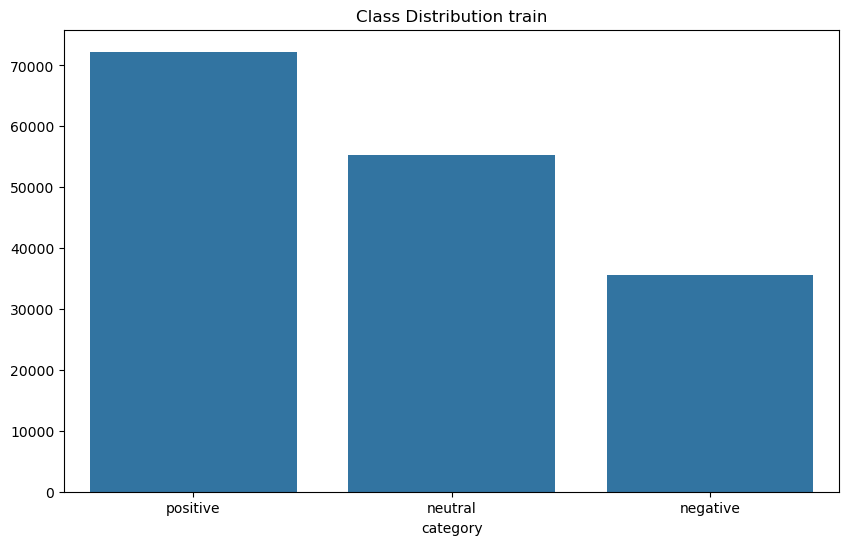

In [38]:
dist = df['category'].value_counts()
def distribution_plot(x, y, name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y)
    plt.title(name)
    plt.show()

distribution_plot(x=dist.index, y=dist.values, name='Class Distribution train')

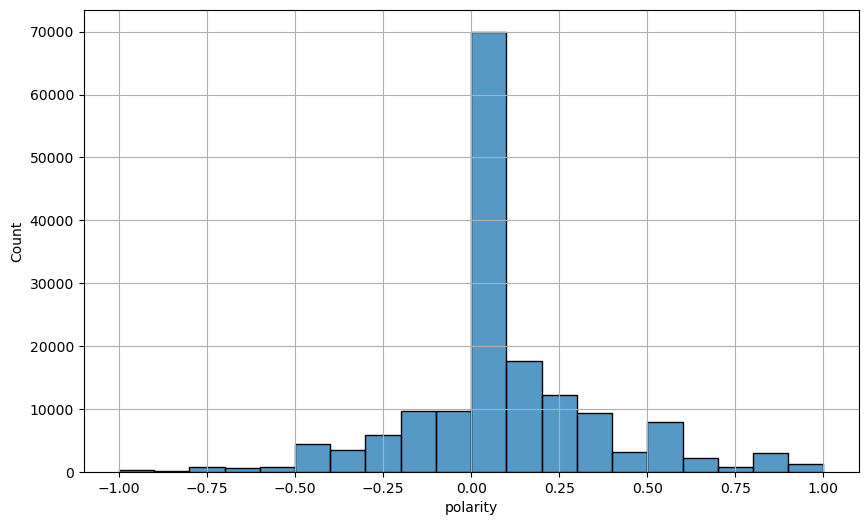

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(x='polarity',data=df,bins=20)
plt.grid(True)

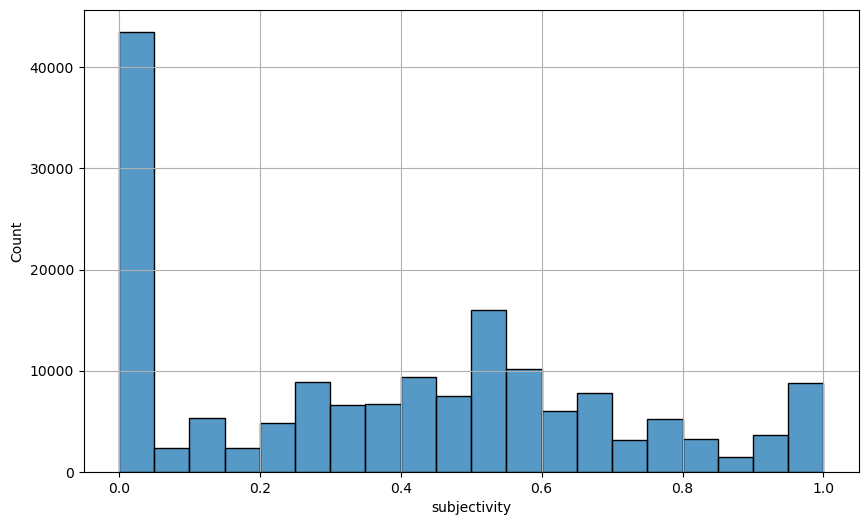

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(x='subjectivity',data=df,bins=20)
plt.grid(True)